###  Here we discuss Logistic functions, also understand their use and behaviours. 
1. Sigmoid 
2. Softmax

#### Multiclass classification : use - Softmax
- means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. 
- Multiclass classification makes the assumption that each sample is assigned **to one and only one label**: a fruit can be either an apple or a pear but not both at the same time.

#### Multilabel classification : use - Sigmoid
- assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.

**Softmax layer is good for multi-class classification while a Sigmoid is good for multi-label.**

-**Sigmoid** = Multi-Label Classification Problem = More than one right answer = Non-exclusive outputs (e.g. chest x-rays, hospital admission)

-**Softmax** = Multi-Class Classification Problem = Only one right answer = Mutually exclusive outputs (e.g. handwritten digits, irises)

![title](sigmoidvssoftmax2-1.png)
![title](sigmoidvssoftmax3.png) 

#### Linear Regression :
- could help us predict the student’s test score on a scale of 0 - 100. 
- Linear regression predictions are continuous (numbers in a range).

#### Logistic Regression  :
- could help use predict whether the student passed or failed. 
- Logistic regression predictions are discrete (only specific values or categories are allowed). 
- We can also view probability scores underlying the model’s classifications.

#### Types of logistic regression
- Binary (Pass/Fail)
- Multi (Cats, Dogs, Sheep)
- Ordinal (Low, Medium, High)
- http://rasbt.github.io/mlxtend/user_guide/classifier/SoftmaxRegression/

#### Sigmoid function :
- y = mx + c : linear function
- $\large\frac {1} {1+e^-y}$ : Logistic function/Sigmoid Function 
- $\large\frac{1} {1+e^-(mx+c)}$  :Subtituting the Linear function into Logistic Function 
- Passing this into Logictic function we get the Probablity
- A sigmoid function can be used in multi-label classification. 
- The sigmoid function is another logistic function that has a characteristic "S-curve", or a smoothed out version of a step function. Sigmoids are often introduced into neural nets to provide non-linearity to the model and are typically used for clustering, pattern classification, and function approximation. 
- Unlike **softmax** which gives a probability distribution around k classes, **sigmoid** functions allow for independent probabilities. 
- When looking at a sigmoid function as a neuron in a neural network, input values of a sigmoid neuron can be any value between 0 and 1 and the output is the sigmoid function. 
- Logistic Sigmoid Function: 
![title](logistic_regression_schematic.png) 

#### Softmax Function :
- Multi-class Logistic Function 

##### Softmax : 
- Softmax is used to calculate the probability distribution of a particular label over k different labels. 
- Softmax returns a range of 0 to 1 for its outputs with all probabilities equalling 1. 
- For multi-lables, this will return a probability for each label with the target label having the highest probability. 
- This is ideal when predicting one label over a set of labels

- ![title](softmax_schematic_1.png) 

- $ P(y=j \mid z^{(i)}) = \phi_{softmax}(z^{(i)}) = \large\frac{e^{z^{(i)}}}{\sum_{j=0}^{k} e^{z_{k}^{(i)}}}$

- Softmax is an activation function where:
    - all of the activations add up to 1
    - all of the activations are greater than 0
    - all of the activations are less than 1

- softmax is equal to  to the activation divided by the sum of  to the activations. That's called softmax.

- https://www.youtube.com/watch?v=uQtTwhpv7Ew&feature=youtu.be&t=7395

- So when we're doing single label multi-class classification, you generally want softmax as your activation function and you generally want cross-entropy as your loss. Because these things go together in such friendly ways, PyTorch will do them both for you.

- Sigmoid and Softmax is that while both give output in [0,1] range, 
    - Softmax ensures that the <b>sum of outputs</b> along channels (as per specified dimension) is 1 i.e., they are probabilities. 
    - Sigmoid just makes output between 0 to 1.

#### Cross Entropy 
- L : Labels , Actuals
- S : Softmax Probablity 
- cost function/Cross Entropy / log loss  = - L log S - (1 - L) log (1 - S)
- CE(S,L) = - L log S - (1 - L) log (1 - S)
    - L,S = 0 -> Not Spam
    - L,S = 1 -> Spam
- Label L = 0 : Not Spam
    - -log (1 - S)
    - S -> 0 , -log(1-S) is Less +ve (Smaller loss) 
    - S -> 1 , -log(1-S) is More + ve (Bigger loss)
- Label L = 1
    - log S
    - S -> 0 , -log S is More +ve (Bigger loss)
    - S-> 1 ,  -log S is Less +ve (Smaller loss)

#### Minimizing Function :
- Goal is to minimize cross entropy loss
- Cost Function  = $\frac{1} {M} \sum_{i=1}^M CE({mx+c},{Label})$

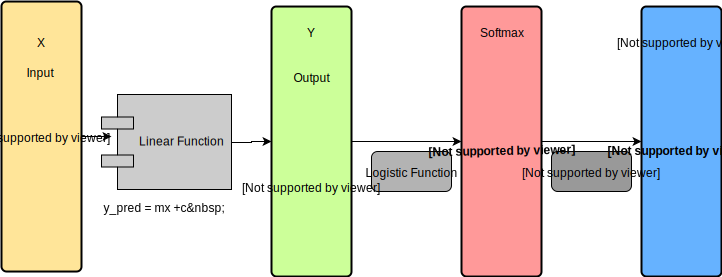

In [5]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('Logistic_regression.svg'))

show_svg()

##### Programming Logistic regression with MNIST dataset :
- Step 1 : Load Dataset
    - Split the data into Train
    - Split the data into Test
    - Display the data 
- Step 2 : Make Dataset Iterable
    - Total Data : 60000
    - minibatch : 100
    - Iteration : 3000
    - Epochs  : **epochs = iterations / (total data / minibatch)** =  3000 / (60000/100) = 5 
- Step 3 : Create Model Class 
- Step 4 : Intanstiate Model Class
- Step 5 : Instanstiate Loss Class
- Step 6 : Instanstiate Optimizer Class
- Step 7 : Train Model
   1.   Convert Inputs/labels to variables
   -  Clear gradients buffers
   -  Get the output given input
   -  Get Loss
   -  Get Gradeints
   -  Update Parameters using gradients
   -  Repeat

## Step 1 : Load Dataset

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [2]:
#Loading MNIST data set 
train_dataset =  dsets.MNIST(root="./data",
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [3]:
len(train_dataset),train_dataset.classes,type(train_dataset[0]),type(train_dataset[1])

(60000,
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 tuple,
 tuple)

In [4]:
# Input matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [5]:
# Label
train_dataset[0][1]

5

In [6]:
#Display the Dataset 

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [8]:
show_image = train_dataset[0][0].numpy().reshape(28,28)

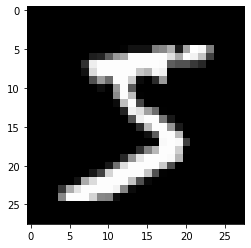

In [9]:
plt.imshow(show_image,cmap='gray')

In [10]:
# Label
train_dataset[0][1]

5

In [11]:
test_dataset =  dsets.MNIST(root="./data",
                            train=False,
                            transform=transforms.ToTensor()
                            )

In [12]:
len(test_dataset),test_dataset.classes,type(test_dataset[0]),type(test_dataset[1])

(10000,
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'],
 tuple,
 tuple)

In [13]:
test_dataset[0][0].size()

torch.Size([1, 28, 28])

In [14]:
test_dataset[0][1]

7

In [15]:
show_image = test_dataset[0][0].numpy().reshape(28,28)

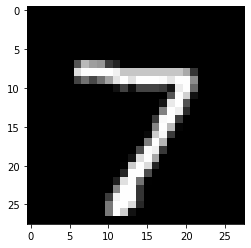

In [16]:
plt.imshow(show_image,cmap='gray')

## Step 2 : Make Dataset Iterable

In [17]:
batch_size=100
n_iters = 3000

num_epochs = n_iters / (len(train_dataset)/batch_size)
num_epochs =int(num_epochs)
num_epochs

5

In [18]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [19]:
# Check data can be iterated 
import collections
isinstance(train_loader,collections.Iterable)

D:\ML\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [20]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

In [21]:
isinstance(test_loader,collections.Iterable)

True

## Step 3 : Create Model Class : Build a Linear regression 

In [22]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super().__init__()
        self.Linear = nn.Linear(input_dim,output_dim)
        
    def forward(self,x):
            out = self.Linear(x)
            return out

## Step 4 : Intanstiate Model Class

In [23]:
# Input Dim = size of the image = 28 * 28 = 784 
# Output Dim = 10 = predict 10 numbers 
input_dim =  28*28
output_dim = 10

model = LinearRegressionModel(input_dim,output_dim)

## Step 5 : Instanstiate Loss Class

- Since we are using crossentropy loss the Linear function gets converted to logistic function , softmax is inherited in the CrossEntropyLoss

In [24]:
criterion  = nn.CrossEntropyLoss()

## Step 6 : Instanstiate Optimizer Class

In [25]:
learning_rate=0.01
optimizer  = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [26]:
model.parameters(),len(list(model.parameters())),list(model.parameters())

(<generator object Module.parameters at 0x0000024DF74AC750>,
 2,
 [Parameter containing:
  tensor([[-6.2775e-05, -1.7992e-02, -1.4125e-02,  ...,  3.4856e-02,
            2.1087e-02,  3.4633e-02],
          [ 2.8196e-02,  9.6199e-03, -3.3445e-02,  ..., -2.8764e-03,
           -3.2032e-02,  2.5530e-02],
          [ 1.1177e-03, -2.0589e-02, -3.3777e-03,  ..., -3.9267e-03,
           -1.4245e-02,  2.5070e-02],
          ...,
          [ 2.0845e-03,  3.4076e-02,  3.0595e-02,  ...,  2.9534e-02,
           -3.0536e-02,  1.5214e-02],
          [-1.3312e-02, -2.2213e-02, -3.0292e-02,  ..., -1.9818e-02,
           -2.1504e-02, -1.4282e-03],
          [-1.0623e-02,  3.3806e-02,  2.8494e-02,  ..., -2.1546e-02,
            2.2427e-02, -3.5479e-02]], requires_grad=True),
  Parameter containing:
  tensor([-0.0236, -0.0067,  0.0137,  0.0334,  0.0296,  0.0232, -0.0256, -0.0336,
          -0.0192,  0.0036], requires_grad=True)])

In [27]:
list(model.parameters())[0].size(),list(model.parameters())[1].size()

(torch.Size([10, 784]), torch.Size([10]))

![title](Logistic_regression_part2.svg)

## Step 7 : Train Model
   1.   Convert Inputs/labels to variables
   -  Clear gradients buffers
   -  Get the output given input, forward pass
   -  Get Loss
   -  Get Gradeints
   -  Update Parameters using gradients
   -  Repeat

In [ ]:
iter = 0
# Iterate 5 time 
for epoch in range (num_epochs):
# Loop through all the 60000 images
    for i,(images,labels) in enumerate(train_loader):
        # Load inamges to variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        #print ("iter" , i)
        # Reset the gradients 
        optimizer.zero_grad()
        
        # Perform Forward pass
        output = model(images)
        
        # Get the loss 
        loss = criterion(output,labels)
    
        # Get the gradients 
        loss.backward()
        
        # update the parameters 
        optimizer.step()
        
        iter +=1
        
        if iter % 500 == 0 :
            # calculate accuracy 
            correct = 0.
            total = 0.
            j = 0
            for images,labels in test_loader: 
                images = Variable(images.view(-1,28*28))
                output = model(images)
                j += 1
                print("loop", j )
                _,predicted = torch.max(output,1) # returns the max prediction
                
                correct += (predicted == labels).sum()
                print("correct",correct)
            accuracy = 100 *(correct / total)
            print (accuracy)
            
            #Print loss
            print('Iteration: {} . Loss:  {}. Accuracy: {}'.format(iter,loss.data[0],accuracy))
            

### Understand : Logistic regression  : https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html#binary-logistic-regression